Connected to database: data_warehouse.db
Table employees created successfully
Fetched Data:
(1, 'Alice', 24, 50000)
(2, 'Bob', 30, 60000)
(3, 'Charlie', 22, 55000)
(4, 'David', 35, 70000)
(5, 'Eva', 28, 65000)
Dataframe Head:
   id     name  age  salary
0   1    Alice   24   50000
1   2      Bob   30   60000
2   3  Charlie   22   55000
3   4    David   35   70000
4   5      Eva   28   65000

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5 non-null      int64 
 1   name    5 non-null      object
 2   age     5 non-null      int64 
 3   salary  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes
None

Dataframe Description:
             id        age       salary
count  5.000000   5.000000      5.00000
mean   3.000000  27.800000  60000.00000
std    1.581139   5.118594   7905.69415
min    1.000000  22.000000  5

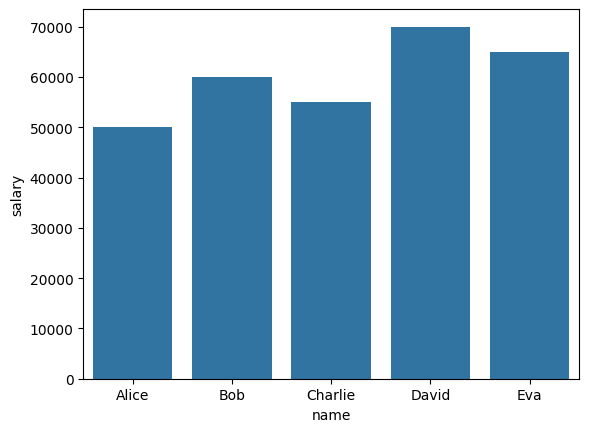

In [9]:
#creating a simple data warehouse using python
#using pandas and sqlite3
import pandas as pd
import sqlite3
import os
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

#function to create a database connection
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Connected to database: {db_file}")
    except Error as e:
        print(e)
    return conn
#function to execute a query
def execute_query(conn, query):
    try:
        c = conn.cursor()
        c.execute(query)
        conn.commit()
        print("Query executed successfully")
    except Error as e:
        print(e)
#function to fetch data from a query
def fetch_data(conn, query):
    try:
        c = conn.cursor()
        c.execute(query)
        rows = c.fetchall()
        return rows
    except Error as e:
        print(e)
        return None
#function to create a table from a dataframe
def create_table_from_df(conn, df, table_name):
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Table {table_name} created successfully")

#function to visualize data
def visualize_data(df, x, y, kind='bar'):
    if kind == 'bar':
        sns.barplot(x=x, y=y, data=df)
    elif kind == 'line':
        sns.lineplot(x=x, y=y, data=df)
    elif kind == 'scatter':
        sns.scatterplot(x=x, y=y, data=df)
    plt.show()
#function to perform basic data analysis
def basic_data_analysis(df):
    print("Dataframe Head:")
    print(df.head())
    print("\nDataframe Info:")
    print(df.info())
    print("\nDataframe Description:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

#main function

def main():

    database = "data_warehouse.db"
    conn = create_connection(database)
    if conn is not None:
        #create a sample dataframe
        data = {
            'id': [1, 2, 3, 4, 5],
            'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
            'age': [24, 30, 22, 35, 28],
            'salary': [50000, 60000, 55000, 70000, 65000]
        }
        df = pd.DataFrame(data)
        #create table from dataframe
        create_table_from_df(conn, df, 'employees')
        #fetch data from table
        rows = fetch_data(conn, "SELECT * FROM employees")
        print("Fetched Data:")
        for row in rows:
            print(row)
        #perform basic data analysis
        basic_data_analysis(df)
        #visualize data
        visualize_data(df, x='name', y='salary', kind='bar')
        conn.close()
    else:
        print("Error! Cannot create the database connection.")

if __name__ == '__main__':
    main()

# This script creates a simple data warehouse using Python, SQLite, and Pandas.
# It includes functions to create a database connection, execute queries, fetch data, create tables from dataframes, visualize data, and perform basic data analysis.